In [11]:
using CSV
using DataFrames
using Flux
using Plots

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278


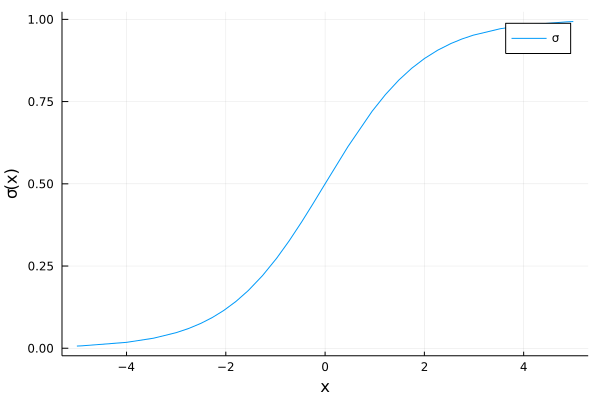

In [3]:
plot(σ, -5, 5, label="\\sigma", xlabel="x", ylabel="\\sigma\\(x\\)")

In [4]:
# 2 input neurons flowing int one output w/ sigoid activation
mod = Dense(2, 1, σ) 

Dense(2, 1, σ)

In [5]:
mod.W

1×2 Array{Float32,2}:
 -1.0251  -0.340981

In [6]:
mod.b

1-element Array{Float32,1}:
 0.0

In [7]:
typeof(mod.W)

Array{Float32,2}

In [8]:
x = rand(2)
mod(x)

1-element Array{Float64,1}:
 0.34525758646367405

In [9]:
σ.(mod.W * x + mod.b)

1-element Array{Float64,1}:
 0.34525758646367405

In [10]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y; agg) in Flux.Losses at /Users/dsatterthwaite/.julia/packages/Flux/qp1gc/src/losses/functions.jl:42

In [12]:
DATA = "../../data"

"../../data"

In [17]:
apples = DataFrame(
    CSV.File("$DATA/apples.dat", 
             delim='\t', 
             #allowmissing=:none, 
             normalizenames=true))
bananas = DataFrame(
    CSV.File("$DATA/bananas.dat", 
             delim='\t', 
             #allowmissing=:none, 
             normalizenames=true))
first(bananas, 5)

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329


In [18]:
x_apples = [[row.red, row.green] for row in eachrow(apples)]
x_bananas = [[row.red, row.green] for row in eachrow(bananas)];

In [20]:
xs = [x_apples; x_bananas]
ys = [fill(0, size(x_apples)); fill(1, size(x_bananas))];

In [21]:
mod = Dense(2, 1, σ)

Dense(2, 1, σ)

In [23]:
mod(xs[1]) # not trained

1-element Array{Float64,1}:
 0.6238463422491842